[View in Colaboratory](https://colab.research.google.com/github/schwaaweb/aimlds1_03/blob/master/T03_CCS--Solution_of_High_Dimensionality_Closest_Pair_of_Points_CC_Master.ipynb)

# Closest Pair of Points Coding Challenge

In [0]:
import numpy as np

This exercise builds on the same ideas covered in the last one, so feel free to reuse any functions. Today we'll start by defining a function that takes
in a number of dimensions (call it n) and spits out a random vector n-dimensional vector. Each component of the vector should be randomly pulled from a
normal distribution with mean 0 and standard deviation 1.

In [0]:
# Function that generates a n-dimensional vector from a normal distribution
def get_vec(mean,stddev):
    return np.random.normal(mean,stddev,1)

Now generate a list of 50 vectors in 50-dimensional space. Call the list vec_list.

In [0]:
# vec_list = 50 vectors in 50 dimensional space
point_50d = np.random.normal(0,1,50)

# multivariate normal library in 2d:
points_2d = np.random.multivariate_normal([0,0],[[1,0],[0,1]],50)

points_50d = np.random.multivariate_normal(np.zeros(50),np.identity(50),50)

To every two vectors v1 and v2, recall how we calculate the distance bewteen v1 and v2. With that in mind, find the two
vectors closest to one another and print the distance between them. Hint: the answer isn't zero. 

[Closest pair of points problem](https://en.wikipedia.org/wiki/Closest_pair_of_points_problem)

In [0]:
# Implementation of Closest Pair of Points algorithm
def compute_closest_pair(set_of_points):
    minimum_distance = np.inf; #infinity as a "number"
    best_points = [-1,-1]
    for i in range(set_of_points.shape[0]):
        for j in range(i+1,set_of_points.shape[0]):
            dist = np.linalg.norm(set_of_points[i] - set_of_points[j])
            #print(i,j,dist)
            if(dist < minimum_distance):
                minimum_distance = dist
                best_points = np.array([set_of_points[i],set_of_points[j]])
    return minimum_distance, best_points

In [42]:
print(points_2d.shape)
distance, best_points = compute_closest_pair(points_2d)
print('shortest pair:',distance)
print('pair', best_points)
print(best_points[0],best_points[1])

(50, 2)
shortest pair: 0.09474987783241023
pair [[ 0.15366806 -0.60186199]
 [ 0.24719993 -0.6170056 ]]
[ 0.15366806 -0.60186199] [ 0.24719993 -0.6170056 ]


[0.15366806 0.24719993] [-0.60186199 -0.6170056 ]


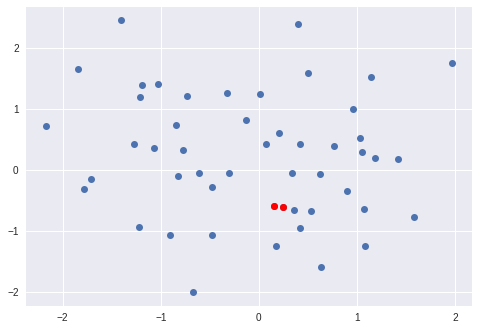

In [43]:
import matplotlib.pyplot as plt
plt.plot(points_2d[::,0:1:],points_2d[::,1:2:],'o')

# Here: Better make sure that we separate these points into x and y pairs
x,y = best_points.T
print(x,y)
plt.plot(x,y,'or')

# The 3d case: Literally the most fun visualization a human can perceive.

_Unless, like Mat Calkins, you studied high dimensional abstract algebra for many many hours_

In [0]:
points_3d = np.random.multivariate_normal(np.zeros(3),np.identity(3),10)

distance 0.550104225089912
best_points [[-0.88360158 -0.70788025  1.35941638]
 [-0.52426213 -0.62991323  0.95025753]]


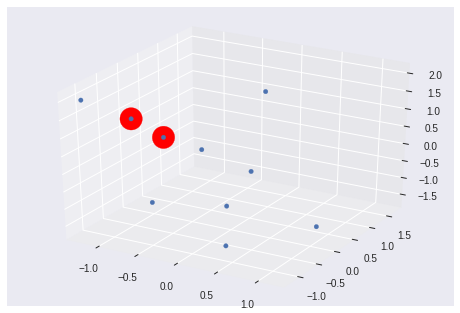

In [71]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X1, Y1, Z1 = points_3d.T

scatter1 = ax.scatter(X1, Y1, Z1, marker = 'o', alpha=1.0)

distance, best_points = compute_closest_pair(points_3d)

bx, by, bz = best_points.T
print('distance', distance)
print('best_points', best_points)

scatter2 = ax.scatter(bx, by, bz, color = 'red', marker = 'o', s=500, alpha=1.0)


Now find the two vectors furthest from one another.

In [0]:
# Inversion of Closest Pair of Points algorithm